In [70]:
import mlband.mp as MP
from mlband.imports import *
from mlband import plot_formatter
import mlband.data

In [71]:
from mp_api.client import MPRester

In [72]:
importlib.reload(MP)
importlib.reload(mlband.data)

<module 'mlband.data' from '/Users/ali/GitHub/rewotes/adavaria/mlband/data.py'>

### Getting the list of materials

In [76]:
df, data = mlband.data.get_list_of_materials(num_chunks=20)

Retrieving SummaryDoc documents: 100%|██████████| 20000/20000 [00:19<00:00, 1049.67it/s]

Number of missing values:  2


In [77]:
df

,material_id,band_gap,structure
0,mp-757220,5.3849,"[[6.53586997 0.39866238 2.62533396] Lu, [6.928..."
1,mp-573369,3.7419,"[[ 1.63145925 0.23570193 10.77716588] Cs, [1...."
2,mp-28967,0.7792,"[[4.55529863 5.11963834 2.01471426] Ba, [1.801..."
3,mp-559295,2.6721,"[[0.57211092 2.00312375 5.90744327] Fe, [3.888..."
4,mp-1293179,0.0000,"[[-8.73143724 -5.0599669 -7.23635549] Li, [-2..."
...,...,...,...
19993,mp-2715949,1.5098,"[[-2.79248853 4.83813866 5.78084703] Na, [6...."
19994,mp-1207979,0.0000,"[[ 1.99364737 -7.0085493 0. ] U, [1.9..."
19995,mp-1218689,0.7712,"[[2.982158 1.68966376 0. ] Sr, [ 2.98..."
19996,mp-2222762,0.0000,"[[3.11575461 3.11575461 3.11575461] Sm, [1.341..."


In [81]:
importlib.reload(mlband.data)

<module 'mlband.data' from '/Users/ali/GitHub/rewotes/adavaria/mlband/data.py'>

In [82]:
mlband.data.create_dataset(df=df, path='data/mp/')

/Users/ali/mambaforge/envs/cgcnn/lib/python3.11/site-packages/pymatgen/core/periodic_table.py:120: UserWarning: No Pauling electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(


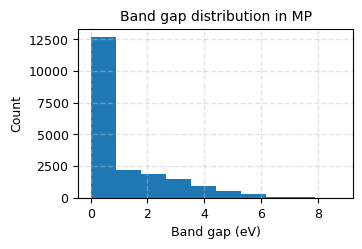

In [79]:
ax = df['band_gap'].hist()
ax.set_xlabel('Band gap (eV)')
ax.set_ylabel('Count')
ax.set_title('Band gap distribution in MP')
pass

In [11]:
data = MP.mpr.materials.summary.search(
    # chemsys="Si-O", 
    fields=['material_id', 'composition', 'band_gap', 'structure'],
    chunk_size=1000,
    num_chunks=1,
)

df = MP.mp_summary_to_df(data)

Retrieving SummaryDoc documents: 100%|██████████| 1000/1000 [00:00<00:00, 35848752.14it/s]


In [85]:
# Checking the missing values
ind = ~(df['band_gap'] >= 0)
print('Number of missing values: ', ind.sum())
# Drop the missing values
df = df.loc[~ind, :]
# Reset the index
df.reset_index(drop=True, inplace=True)

Number of missing values:  0


In [55]:
df.to_pickle('data/mp.pkl')